<a href="https://colab.research.google.com/github/jjunga1203/Books/blob/master/5_day_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코인 값 예측

In [1]:
file_name = './BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv'

In [2]:
ls

BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv  drive/  sample_data/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
!head ./BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv

Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
BTC,2019-02-28,3772.9363353275,3796.6372843084,3824.1658793727,3666.5240164294
BTC,2019-03-01,3799.678542951,3773.4414607526,3879.2311846694,3753.8000224646
BTC,2019-03-02,3811.6119793671,3799.3670260062,3840.0448230745,3788.9184983301
BTC,2019-03-03,3804.4191701095,3806.6915127875,3819.1943561235,3759.4092164743
BTC,2019-03-04,3782.6641011218,3807.8457559152,3818.6954813471,3766.2420482277
BTC,2019-03-05,3689.8628931904,3783.3550634445,3804.3536162349,3663.4777433591
BTC,2019-03-06,3832.0808847342,3701.0498710337,3866.7187042421,3688.6971538467
BTC,2019-03-07,3848.9563696825,3832.5924290751,3881.9657697745,3802.516053637
BTC,2019-03-08,3859.8399833296,3848.9563673107,3890.7454923564,3827.6703034796


In [8]:
coin_data = pd.read_csv(file_name, header=0) # header=0은 첫번째 줄을 필드명으로 하겠다

In [9]:
coin_data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048
...,...,...,...,...,...,...
360,BTC,2020-02-24,9919.551448,9689.085992,10008.540472,9666.519497
361,BTC,2020-02-25,9640.469505,9921.048562,10008.378491,9480.185942
362,BTC,2020-02-26,9392.869629,9640.468562,9679.595090,9251.115834
363,BTC,2020-02-27,8787.978363,9392.868579,9393.864137,8626.935746


In [15]:
seq = coin_data[['Closing Price (USD)']].to_numpy()   # 모델에 들어갈 데이터가 2개 이상일 경우를 대비하여 처음부터 [[]] 이렇게 가져온다.

In [17]:
seq.shape

(365, 1)

In [18]:
seq[:3]

array([[3772.93633533],
       [3799.67854295],
       [3811.61197937]])

In [20]:
w = 7 # 윈도우 사이즈 7
h = 1 # 수평선 계수 (바로 다음날 예측)

In [101]:
def get_sample(seq, w, h):
  result_x = []
  result_y = []
  for i in range(len(seq)-w-h+1):
    result_x.append(seq[i:i+w])
    result_y.append(seq[i+w][0])
  return np.array(result_x), np.array(result_y)


In [102]:
samples, preds = get_sample(seq, w, h)

In [109]:
def seq2dataset(seq, w, h):
  X=[]; Y=[]
  for i in range(len(seq)-(w+h)+1):
    x=seq[i:i+w]
    y=seq[i+w+h-1][0]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)


In [110]:
X, Y = seq2dataset(seq, w, h)

In [111]:
X.shape, Y.shape

((358, 7, 1), (358,))

In [112]:
X[0]

array([[3772.93633533],
       [3799.67854295],
       [3811.61197937],
       [3804.41917011],
       [3782.66410112],
       [3689.86289319],
       [3832.08088473]])

In [113]:
split=int(len(X)*0.7)

In [119]:
# train/test split 한다. 시계열 데이터는 shuffle 하지 않음. 순서대로
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]

In [120]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((250, 7, 1), (250,), (108, 7, 1), (108,))

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [124]:
x_train[0].shape

(7, 1)

In [125]:
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

hist = model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test), verbose=1)

Epoch 1/200
250/250 [==============================] - 3s 8ms/step - loss: 2441.5935 - mae: 2441.5935 - val_loss: 414.8186 - val_mae: 414.8186
Epoch 2/200
250/250 [==============================] - 3s 11ms/step - loss: 695.5832 - mae: 695.5832 - val_loss: 1001.3108 - val_mae: 1001.3108
Epoch 3/200
250/250 [==============================] - 3s 10ms/step - loss: 542.3052 - mae: 542.3052 - val_loss: 515.0162 - val_mae: 515.0162
Epoch 4/200
250/250 [==============================] - 2s 6ms/step - loss: 527.5317 - mae: 527.5317 - val_loss: 648.0964 - val_mae: 648.0964
Epoch 5/200
250/250 [==============================] - 2s 7ms/step - loss: 494.1026 - mae: 494.1026 - val_loss: 308.4358 - val_mae: 308.4358
Epoch 6/200
250/250 [==============================] - 2s 6ms/step - loss: 499.2292 - mae: 499.2292 - val_loss: 387.6012 - val_mae: 387.6012
Epoch 7/200
250/250 [==============================] - 2s 7ms/step - loss: 679.8121 - mae: 679.8121 - val_loss: 350.2740 - val_mae: 350.2740
Epoch 8

In [126]:
ev = model.evaluate(x_test, y_test, verbose=0)
print('손실함수:', ev[0], 'mae: ', ev[1])

손실함수: 182.1168212890625 mae:  182.1168212890625


In [130]:
pred = model.predict(x_test)
print(f'평균절댓값백분율오차(MAPE): {sum(abs(y_test-pred)/y_test)/len(x_test)}')    # 시계열로 비교할 데이터가 여러개이며, 값의 크기차이가 큰 경우 백분율오차를 사용하게 됨.

4/4 [==============================] - 0s 8ms/step
평균절댓값백분율오차(MAPE): [0.11229825 0.11201096 0.11037288 0.10934142 0.10942369 0.10933755
 0.11127159 0.112372   0.11317957 0.12723052 0.14943755 0.14552824
 0.18111271 0.15546269 0.16545905 0.1310425  0.13863601 0.12297061
 0.13016406 0.13921173 0.14299551 0.14449714 0.15522052 0.13805255
 0.13159909 0.13063715 0.12981671 0.14302335 0.1519383  0.15729861
 0.15835753 0.15204441 0.17391945 0.16987752 0.20763775 0.26213105
 0.13645746 0.16447011 0.1656327  0.14708777 0.15227251 0.16177377
 0.15243682 0.15534009 0.15926393 0.15347288 0.14482309 0.13896288
 0.15059458 0.15979206 0.16054067 0.19533005 0.1466381  0.14265148
 0.14186868 0.12351206 0.11390997 0.11331432 0.12021261 0.11294536
 0.11310241 0.11192093 0.11240012 0.11165722 0.11471084 0.11114613
 0.11751122 0.11804388 0.11016987 0.11032664 0.11108822 0.11013622
 0.10983681 0.1094991  0.1100743  0.10942882 0.11599923 0.12520362
 0.13285992 0.1435983  0.13585017 0.1346822  0.13568112 0.13

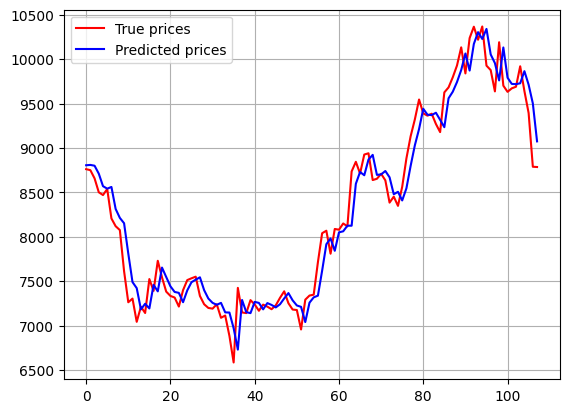

In [131]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

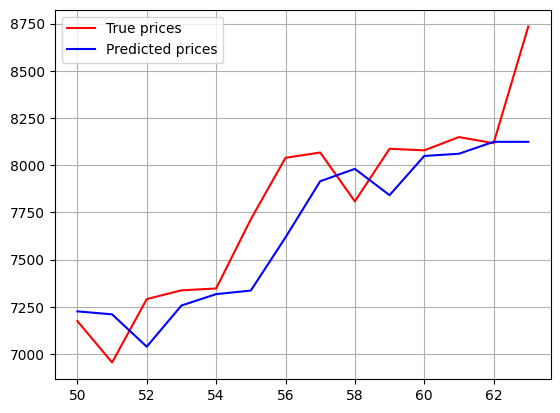

In [132]:
x_range = range(50, 64)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

### 음계 분석
```
# 도레미파솔라시 = C D E F G A B
# 2,4,8 음표
# 두개의 조합은 총 21개
```



In [133]:
import music21

In [134]:
# 작은별 악보
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"

In [137]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf


In [136]:
# 계이름과 숫자를 상호 변환 (딕셔너리 활용)
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

In [138]:
def abc2timeseries(s):
  notes = s.split(' ')[2:]  # 앞의 두개는 악보가 아니라서 ['tinynotation:', '4/4', 'c4', ...]
  seq = []
  for note in notes:
    seq.append([note2num[note[0]], int(note[1])])     # c4 에서 [0], [1]

  return seq

In [139]:
seq = abc2timeseries(little_star)

In [141]:
# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t): #t = array([[1,4], [2,4], ...])
    s='tinynotation: 4/4'
    for i in t:
        s=s+' '+num2note[i[0]]+str(i[1])
    return s

In [142]:
w = 8 # 윈도우 크기 8 (4/4박자니깐 2마디)
h = 1 # 수평선 계수 1

In [144]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        #y=(seq[i+window+horizon-1])
        y=seq[i+window+horizon-1]
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [145]:
X, Y = seq2dataset(seq, w, h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(34, 8, 2) (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]


In [146]:
split = int(len(X)*1.0)   # 생성형이라 test 가 없다

In [157]:
x_train = X[0:split]
y_train = Y[0:split]

In [158]:
x_train.shape, y_train.shape

((34, 8, 2), (34, 2))

In [159]:
y_train[0]

array([4, 4])

In [160]:
# 원핫 코드로 변환하는 표
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

In [161]:
def to_onehot(length):
  t = []
  for i in range(len(length)):
    a = np.zeros(len(onehot))
    a[onehot.index(list(length[i]))] = 1.0
    t.append(a)

  return np.array(t)

In [162]:
y_train[0]

array([4, 4])

In [163]:
y_train = to_onehot(y_train)

In [164]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [165]:
# LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units = 128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
34/34 [==============================] - 2s 6ms/step - loss: 2.6703 - accuracy: 0.1176
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 2.1879 - accuracy: 0.2059
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 2.0067 - accuracy: 0.2941
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 1.9270 - accuracy: 0.2941
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 1.7722 - accuracy: 0.3235
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 1.6436 - accuracy: 0.4412
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 1.5060 - accuracy: 0.4118
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 1.5698 - accuracy: 0.3235
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 1.3368 - accuracy: 0.5000
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 1.3159 - accuracy: 0.5000
Epoch 11/

In [167]:
# 생성
def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        #print(p)
        music=np.append(music,[onehot[np.argmax(p)]],axis=0)      # np.argmax(p) 는 원핫인코딩된 값이 실제 어떤값에 해당하는지 숫자로 바꿔준다.
    return timeseries2abc(music)

In [168]:
new_song = arranging_music(model,x_train[0],50)    # 다음 50 마디를 추론하도록

1/1 [==============================] - 0s 21ms/step


In [169]:
new_song

'tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4'